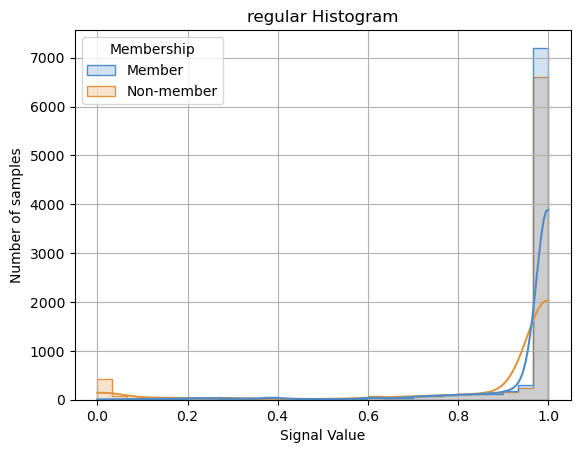

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_singnals(signals, memberships, method, threshold=None, base_path=None, save=False, show=False):

    # 设置绘图风格
    # sns.set(style="whitegrid")
    # 绘制带有核密度估计的直方图
    # plt.figure(figsize=(10, 6))
    histogram = sns.histplot(data=pd.DataFrame(
        {
            "Signal": signals,
            "Membership": [
                "Member" if y == 1 else "Non-member" for y in memberships
            ],
        }
    ),
        x="Signal",
        hue="Membership",
        element="step",
        palette={"Non-member":"#e1943f", "Member":"#4f8cc9"},
        bins=30,
        #stat="density",
        kde=True,
    )

    if threshold is not None:
        histogram.axvline(x=threshold, linestyle="--", color="red".format(2))
        histogram.text(
            x=threshold - (np.max(signals) - np.min(signals)) / 30,
            y=0.8,
            s="Threshold",
            rotation=90,
            color="red",
            transform=histogram.get_xaxis_transform(),
        )

    # 设置图形标签和标题
    plt.grid()
    #plt.xlim(min(signals), np.mean(signals))  # 限制x轴的显示范围
    #plt.xscale("log")  # 将x轴设为对数刻度
    plt.title(f"{method} Histogram")
    plt.xlabel("Signal Value")
    plt.ylabel("Number of samples")

    if save:
        filename = base_path + f"signal_histogram.jpg"
        plt.savefig(fname=filename, dpi=400)
    if show:
        plt.show()
    plt.close()

plot_singnals(signals[:,0][auditing_group==0], auditing_membership[0][auditing_group==0], method='regular', show=True)
#plot_singnals(signals[:,0], auditing_membership[0], method='regular', show=True)